<a href="https://colab.research.google.com/github/paula-martinezmoreno/Final-Project-for-Using-Python-for-Research-by-Harvard/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
HarvardX PH526x

### **Using Python for Research**

**Objective**: Predict the type of physical activity (e.g.,walking, climbing stairs) from tri-axial smartphone accelerometer data.

Smartphone accelerometers are very precise, and different physical activities give rise to different patterns of acceleration.

**Project Overview**

This project involves predicting physical activities using smartphone accelerometer data. We will preprocess the data, perform exploratory data analysis, create new features, and build machine learning models to classify the activities.




**Input Data**

The input data used for training in this project consists of two files:  

1. The first file,` train_time_series.csv` , contains the raw accelerometer data, which has been collected using the [Beiwe research platform](https://github.com/onnela-lab/beiwe-backend), and it has the following format:

        timestamp ,  UTC time , accuracy, x , y , z

  We will use the timestamp column as the time variable; you'll also need the last three columns, here labeled x, y, and z, which correspond to measurements of linear acceleration along each of the three orthogonal axes.

2. The second file, `train_labels.csv `, contains the activity labels, and we will be using these labels to train your model. Different activities have been numbered with integers. We use the following encoding:

        1.   1 = standing
        2.   2 = walking
        3.   3 = stairs down
        4.   4 = stairs up

  Because the accelerometers are sampled at high frequency, the labels in train_labels.csv are only provided for every 10th observation in train_time_series.csv.


**Activity Classification**

The goal is to classify different physical activities as accurately as possible. The test data (`test_time_series.csv`) will be used to validate the model, and we will submit predictions in `test_labels.csv`.


In [ ]:
# Start the timer
import time
start_time = time.time()


## Importing the necessary libraries

In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

## Load the data

In [ ]:
#Import the training data
train_time=pd.read_csv('/content/train_time_series.csv')
train_labels=pd.read_csv('/content/train_labels.csv')

#Import the data
test_time=pd.read_csv('/content/test_time_series.csv')
test_label=pd.read_csv('/content/test_labels.csv')

## Check the loaded data

We are going to **check the shape** of our dataset:

In [ ]:
# Shape check
print("train_time (train_time) shape:", train_time.shape)
print("train_labels (train_labels) shape:", train_labels.shape)
print("test_time (test_time) shape:", test_time.shape)
print("test_label (test_label) shape:", test_label.shape)

train_time (train_time) shape: (3744, 7)
train_labels (train_labels) shape: (375, 4)
test_time (test_time) shape: (1250, 7)
test_label (test_label) shape: (125, 4)


The shape is consistant.

**The head of the Datasets**. The first 5 rows:

In [ ]:
print("Training Time head:")
train_time.head()


Training Time head:


,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [ ]:
print("Training Labels head:")
train_labels.head()

Training Labels head:


,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


In [ ]:
print("Test Time head:")
test_time.head()

Test Time head:


,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550


In [ ]:
print("Test Label head:")
test_label.head()

Test Label head:


,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN


 Visualize the distributions of accelerometer data along each axis (X, Y, Z), explore the relationship between acceleration and activity label.

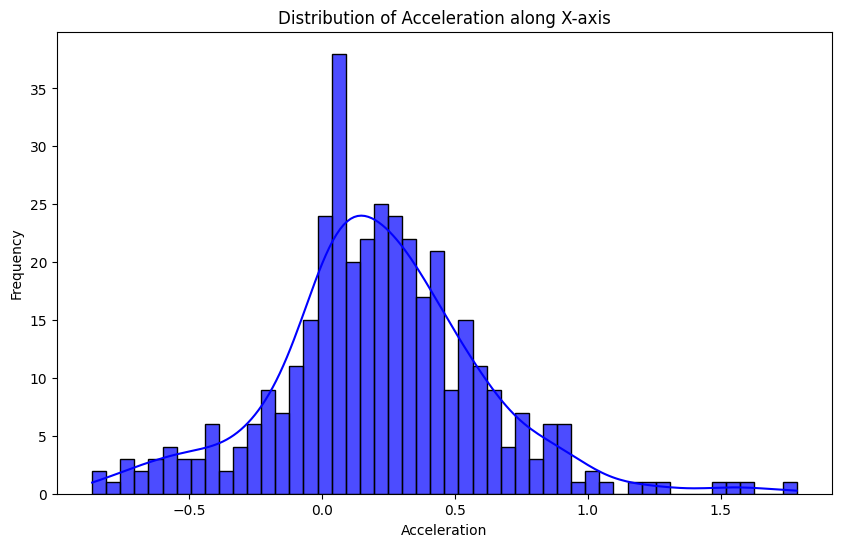

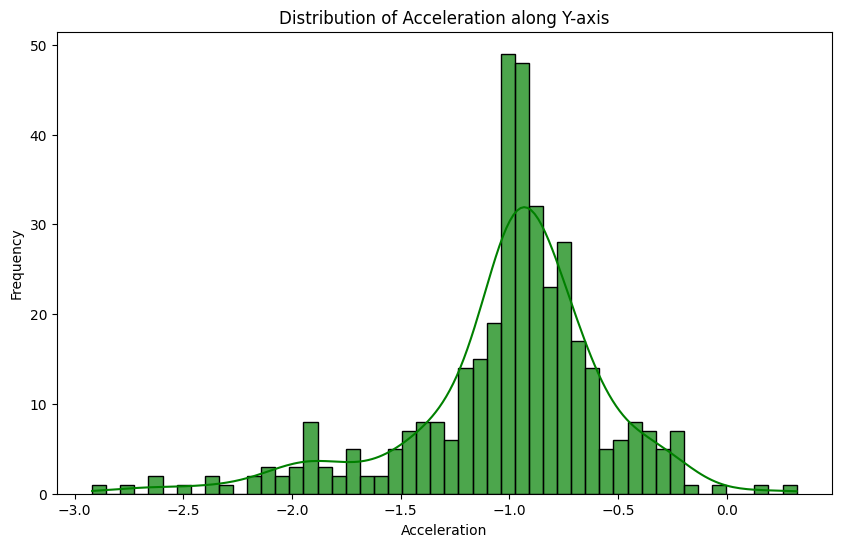

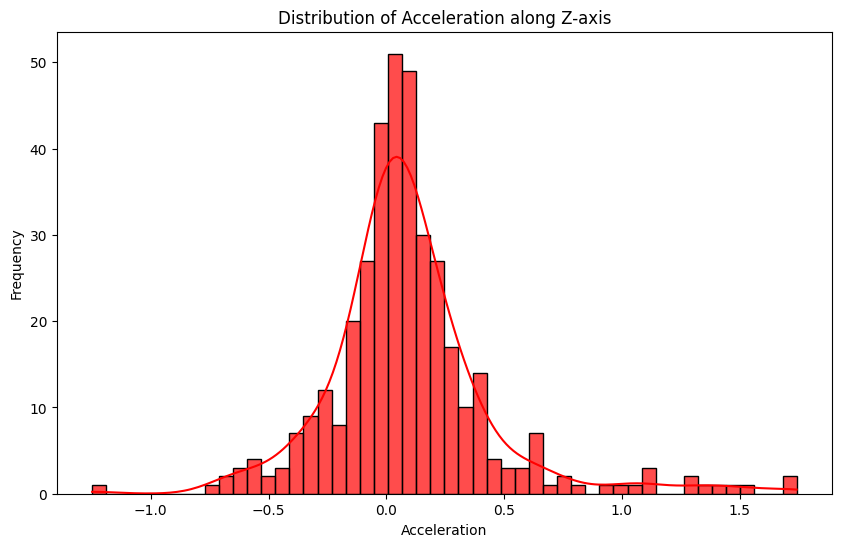

<ipython-input-107-31f4ef38aae7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='label', y='x', palette='coolwarm')


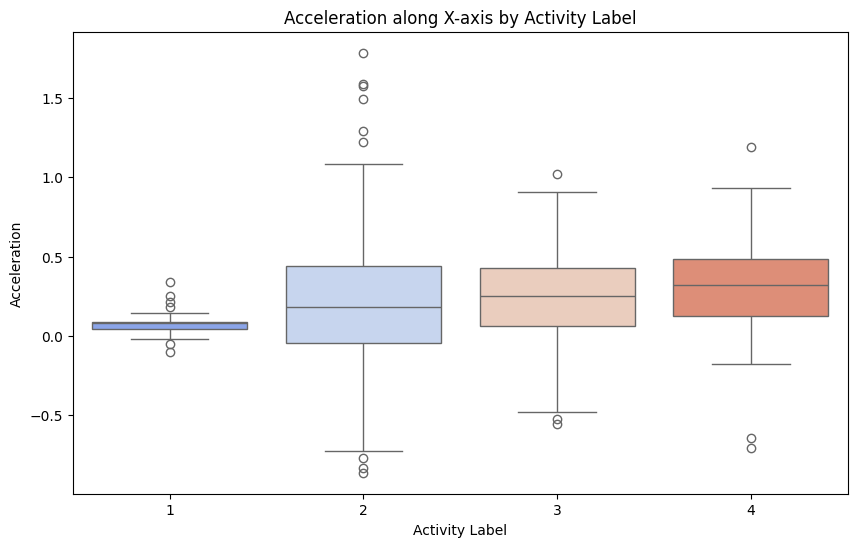

<ipython-input-107-31f4ef38aae7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='label', y='y', palette='coolwarm')


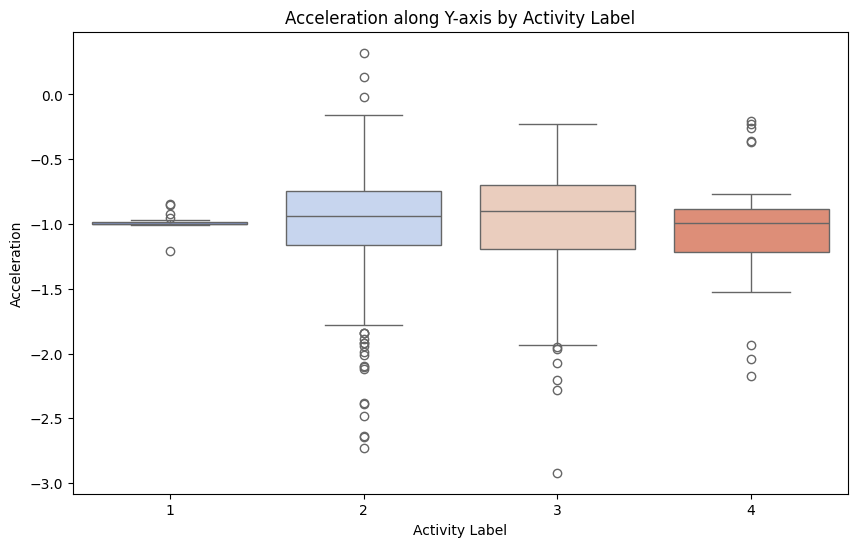

<ipython-input-107-31f4ef38aae7>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='label', y='z', palette='coolwarm')


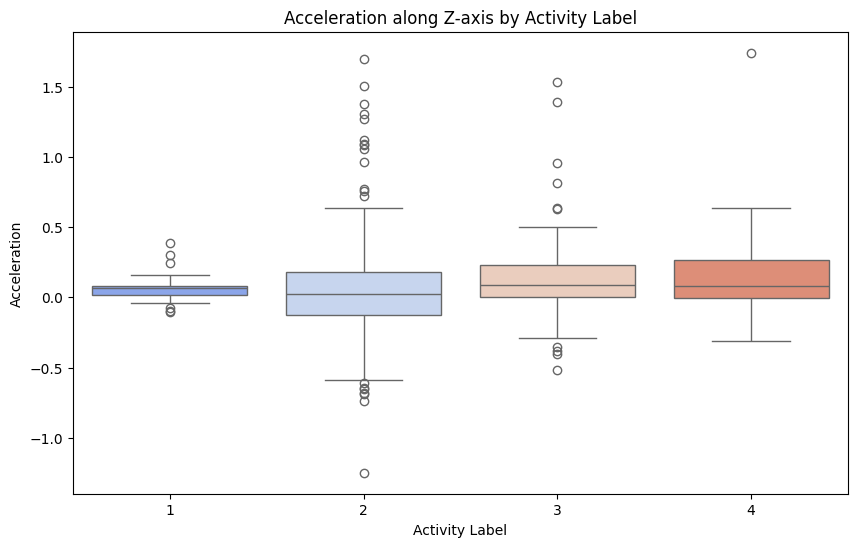

In [ ]:

# Merge train_time and train_labels based on timestamp
merged_data = pd.merge(train_time, train_labels, on='timestamp')

# Visualize distributions of features
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='x', bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Acceleration along X-axis')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='y', bins=50, kde=True, color='green', alpha=0.7)
plt.title('Distribution of Acceleration along Y-axis')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='z', bins=50, kde=True, color='red', alpha=0.7)
plt.title('Distribution of Acceleration along Z-axis')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.show()

# Explore correlations between features and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='label', y='x', palette='coolwarm')
plt.title('Acceleration along X-axis by Activity Label')
plt.xlabel('Activity Label')
plt.ylabel('Acceleration')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='label', y='y', palette='coolwarm')
plt.title('Acceleration along Y-axis by Activity Label')
plt.xlabel('Activity Label')
plt.ylabel('Acceleration')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='label', y='z', palette='coolwarm')
plt.title('Acceleration along Z-axis by Activity Label')
plt.xlabel('Activity Label')
plt.ylabel('Acceleration')
plt.show()


Identify potential outliers or anomalies

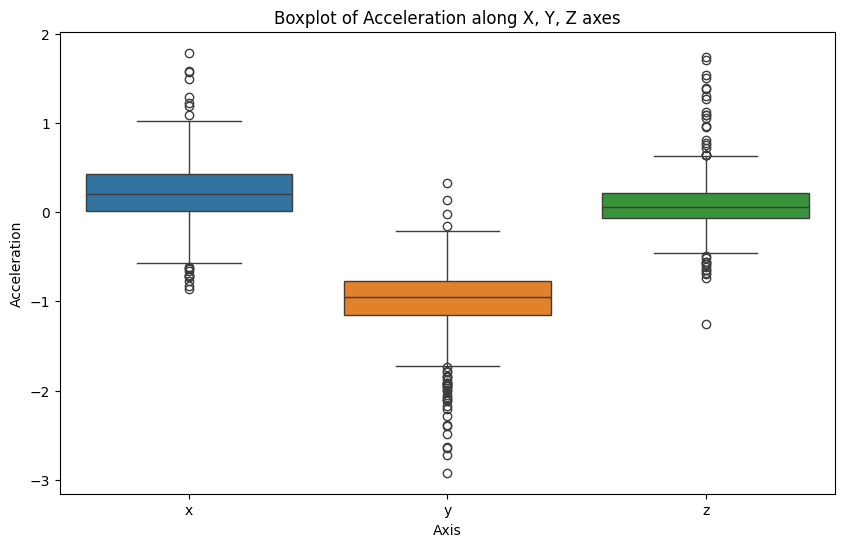

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[['x', 'y', 'z']])
plt.title('Boxplot of Acceleration along X, Y, Z axes')
plt.xlabel('Axis')
plt.ylabel('Acceleration')
plt.show()

## Edit the Datasets

**Remove the `accuracy`** column from the train_time and test_time datasets:

In [ ]:
# Using the .drop() method to drop the 'accuracy' column
train_time.drop("accuracy", axis = 1, inplace = True)
test_time.drop("accuracy", axis = 1, inplace = True)

**Convert the `[UTC time]`** to the format Year-Month-Date,Hour:Minute:Second:Microsecond.

In [ ]:
# Converting the 'UTC time' of training data
train_time['UTC time'] =  pd.to_datetime(train_time['UTC time'], format='%Y-%m-%dT%H:%M:%S.%f')
train_labels['UTC time'] =  pd.to_datetime(train_labels['UTC time'], format='%Y-%m-%dT%H:%M:%S.%f')


# Converting the 'UTC time' of testing data
test_time['UTC time'] =  pd.to_datetime(test_time['UTC time'], format='%Y-%m-%dT%H:%M:%S.%f')
test_label['UTC time'] =  pd.to_datetime(test_label['UTC time'], format='%Y-%m-%dT%H:%M:%S.%f')

Check the **number of NaNs** in the Datasets:

In [ ]:
# Repklce the cells with value infinity to NaN
train_time = train_time.replace([np.inf, -np.inf], np.nan)
train_labels = train_labels.replace([np.inf, -np.inf], np.nan)


In [ ]:
# Printing the count of NaN values in each coulmns
print("\nNumber of NaN values in the input training times:")
print(train_time.isnull().sum())
print("\nNumber of NaN values in the input training labels:")
print(train_labels.isnull().sum())


Number of NaN values in the input training times:
Unnamed: 0    0
timestamp     0
UTC time      0
x             0
y             0
z             0
dtype: int64

Number of NaN values in the input training labels:
Unnamed: 0    0
timestamp     0
UTC time      0
label         0
dtype: int64


Check if there are any **imbalances** in the data:

In [ ]:
# Counting frequency of each label in the `train_time` dataframe
label_count = train_labels["label"].value_counts().to_dict()


# Calculating the percentage of each label
total_count=train_labels["label"].value_counts().sum()
for lab,cou in label_count.items():
    print("{}% of labels are label {}".format(round(cou/total_count*100,2),lab))


56.8% of labels are label 2
23.47% of labels are label 3
12.53% of labels are label 4
7.2% of labels are label 1


Text(0, 0.5, 'Count')

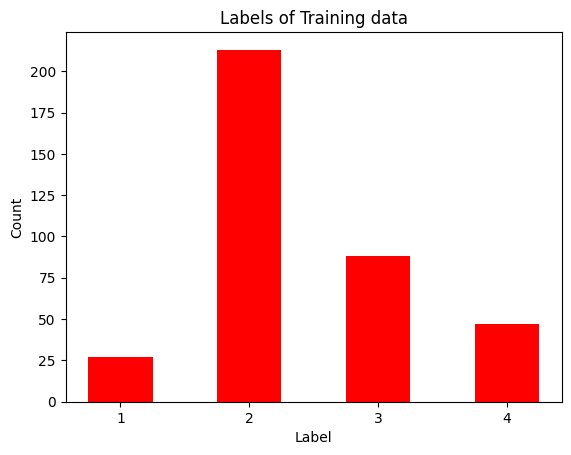

In [ ]:
plt.bar(label_count.keys(),label_count.values(),color="red", width=0.5)
plt.xticks(list(label_count.keys()))
plt.title("Labels of Training data")
plt.xlabel("Label")
plt.ylabel("Count")

The Label 2 has more ocurrences then any other class.

## Calculations

Firstly, **the rolling average** of x,y,z will be calculated:

In [ ]:
def rolling_averages(data):
    data["x_mean"] = data["x"].rolling(window = 4).mean()
    data["y_mean"] = data["y"].rolling(window = 4).mean()
    data["z_mean"] = data["z"].rolling(window = 4).mean()
    return data
train_time=rolling_averages(train_time)
print(train_time)
test_time=rolling_averages(test_time)
print(test_time)

      Unnamed: 0      timestamp                UTC time         x         y  \
0          20586  1565109930787 2019-08-06 16:45:30.787 -0.006485 -0.934860   
1          20587  1565109930887 2019-08-06 16:45:30.887 -0.066467 -1.015442   
2          20588  1565109930987 2019-08-06 16:45:30.987 -0.043488 -1.021255   
3          20589  1565109931087 2019-08-06 16:45:31.087 -0.053802 -0.987701   
4          20590  1565109931188 2019-08-06 16:45:31.188 -0.054031 -1.003616   
...          ...            ...                     ...       ...       ...   
3739       24325  1565110305638 2019-08-06 16:51:45.638  0.024384 -0.710709   
3740       24326  1565110305738 2019-08-06 16:51:45.738  0.487228 -1.099136   
3741       24327  1565110305838 2019-08-06 16:51:45.838  0.369446 -0.968506   
3742       24328  1565110305939 2019-08-06 16:51:45.939  0.167877 -0.802826   
3743       24329  1565110306039 2019-08-06 16:51:46.039  0.689346 -0.991043   

             z    x_mean    y_mean    z_mean  
0   

The **rolling standard deviation** of x,y,z will be calculated:

In [ ]:
def rolling_SD(data):
    data["x_sd"] = data["x"].rolling(window = 4).std()
    data["y_sd"] = data["y"].rolling(window = 4).std()
    data["z_sd"] = data["z"].rolling(window = 4).std()
    return data
train_time=rolling_SD(train_time)
print(train_time)
test_time=rolling_SD(test_time)
print(train_time)

      Unnamed: 0      timestamp                UTC time         x         y  \
0          20586  1565109930787 2019-08-06 16:45:30.787 -0.006485 -0.934860   
1          20587  1565109930887 2019-08-06 16:45:30.887 -0.066467 -1.015442   
2          20588  1565109930987 2019-08-06 16:45:30.987 -0.043488 -1.021255   
3          20589  1565109931087 2019-08-06 16:45:31.087 -0.053802 -0.987701   
4          20590  1565109931188 2019-08-06 16:45:31.188 -0.054031 -1.003616   
...          ...            ...                     ...       ...       ...   
3739       24325  1565110305638 2019-08-06 16:51:45.638  0.024384 -0.710709   
3740       24326  1565110305738 2019-08-06 16:51:45.738  0.487228 -1.099136   
3741       24327  1565110305838 2019-08-06 16:51:45.838  0.369446 -0.968506   
3742       24328  1565110305939 2019-08-06 16:51:45.939  0.167877 -0.802826   
3743       24329  1565110306039 2019-08-06 16:51:46.039  0.689346 -0.991043   

             z    x_mean    y_mean    z_mean      x

**The magnitude of acceleration** of x,y,z and the rolling avarege and standard diviation.

In [ ]:
def add_magnitude(data):
    mag = (data['x'] ** 2) + (data['y'] ** 2 ) + (data['z'] ** 2 )
    mag = mag.apply(lambda x: math.sqrt(x))
    data['magnitude'] = mag
    data["m_mean"] = data["magnitude"].rolling(window = 4).mean()
    data["m_sd"] = data["magnitude"].rolling(window = 4).std()
    return data
train_time=add_magnitude(train_time)
print(train_time)
test_time=add_magnitude(test_time)
print(test_time)

      Unnamed: 0      timestamp                UTC time         x         y  \
0          20586  1565109930787 2019-08-06 16:45:30.787 -0.006485 -0.934860   
1          20587  1565109930887 2019-08-06 16:45:30.887 -0.066467 -1.015442   
2          20588  1565109930987 2019-08-06 16:45:30.987 -0.043488 -1.021255   
3          20589  1565109931087 2019-08-06 16:45:31.087 -0.053802 -0.987701   
4          20590  1565109931188 2019-08-06 16:45:31.188 -0.054031 -1.003616   
...          ...            ...                     ...       ...       ...   
3739       24325  1565110305638 2019-08-06 16:51:45.638  0.024384 -0.710709   
3740       24326  1565110305738 2019-08-06 16:51:45.738  0.487228 -1.099136   
3741       24327  1565110305838 2019-08-06 16:51:45.838  0.369446 -0.968506   
3742       24328  1565110305939 2019-08-06 16:51:45.939  0.167877 -0.802826   
3743       24329  1565110306039 2019-08-06 16:51:46.039  0.689346 -0.991043   

             z    x_mean    y_mean    z_mean      x

The **energy** of each acceleration:

In [ ]:
def add_energy(data):
    data["x_E"] = (data["x"]**2).rolling(window = 4).sum()
    data["y_E"] = (data["y"]**2).rolling(window = 4).sum()
    data["z_E"] = (data["z"]**2).rolling(window = 4).sum()
    return data
train_time=add_energy(train_time)
print(train_time)
test_time=add_energy(test_time)
print(test_time)

      Unnamed: 0      timestamp                UTC time         x         y  \
0          20586  1565109930787 2019-08-06 16:45:30.787 -0.006485 -0.934860   
1          20587  1565109930887 2019-08-06 16:45:30.887 -0.066467 -1.015442   
2          20588  1565109930987 2019-08-06 16:45:30.987 -0.043488 -1.021255   
3          20589  1565109931087 2019-08-06 16:45:31.087 -0.053802 -0.987701   
4          20590  1565109931188 2019-08-06 16:45:31.188 -0.054031 -1.003616   
...          ...            ...                     ...       ...       ...   
3739       24325  1565110305638 2019-08-06 16:51:45.638  0.024384 -0.710709   
3740       24326  1565110305738 2019-08-06 16:51:45.738  0.487228 -1.099136   
3741       24327  1565110305838 2019-08-06 16:51:45.838  0.369446 -0.968506   
3742       24328  1565110305939 2019-08-06 16:51:45.939  0.167877 -0.802826   
3743       24329  1565110306039 2019-08-06 16:51:46.039  0.689346 -0.991043   

             z    x_mean    y_mean    z_mean      x

## Classification Models

Let's split the dataframe to find back our initial train_time set (with labels) and train_time set (without labels) but now with additional features.

In [ ]:
def get_subset(start_ind, data):
    ind=np.arange(start_ind, start_ind+len(data), 10)
    sub_data=data[data["Unnamed: 0"].isin(ind)]
    return sub_data

In [ ]:
sub_train_time=get_subset(20589,train_time)
sub_test_time=get_subset(24339,test_time)


# Storing the subsets as seperate '.csv' files for future use
sub_train_time.to_csv("sub_train_time.csv", mode="w")
sub_test_time.to_csv("sub_test_time.csv", mode="w")

Drop rows with NaN values in train_time and test_time set.

In [ ]:
# train_time
train_time = sub_train_time.dropna(how = "any")
train_time.reset_index(drop = True, inplace = True)


#test_time
test_time = sub_test_time.dropna(how = "any")
test_time.reset_index(drop = True, inplace = True)

In [ ]:
sub_train_time.isnull().any()

Unnamed: 0    False
timestamp     False
UTC time      False
x             False
y             False
z             False
x_mean        False
y_mean        False
z_mean        False
x_sd          False
y_sd          False
z_sd          False
magnitude     False
m_mean        False
m_sd          False
x_E           False
y_E           False
z_E           False
dtype: bool

In [ ]:
sub_test_time.isnull().any()

Unnamed: 0    False
timestamp     False
UTC time      False
x             False
y             False
z             False
x_mean        False
y_mean        False
z_mean        False
x_sd          False
y_sd          False
z_sd          False
magnitude     False
m_mean        False
m_sd          False
x_E           False
y_E           False
z_E           False
dtype: bool

## Imbalanced classes

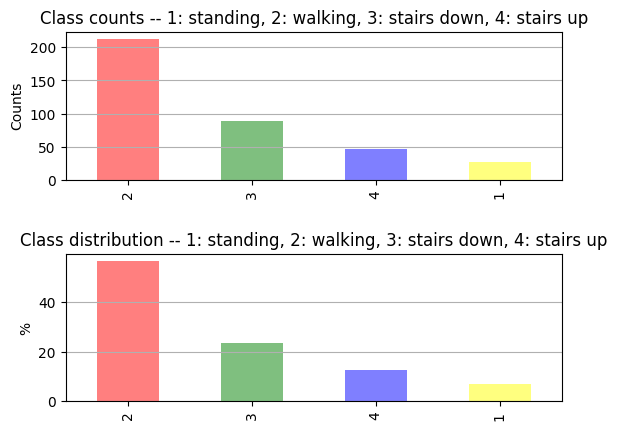

In [ ]:
# Visualization of classes balance.

clist = ["red", "green", "blue", "yellow"]

fig, (ax1, ax2) = plt.subplots(2)

train_labels["label"].value_counts().plot(kind = "bar", color = clist, alpha = 0.5, ax = ax1)
ax1.yaxis.grid(True)
ax1.set_ylabel("Counts")
ax1.set_title("Class counts -- 1: standing, 2: walking, 3: stairs down, 4: stairs up")

distrib = train_labels["label"].value_counts(normalize = True)*100.00
distrib.plot(kind = "bar", color = clist, alpha = 0.5, ax = ax2)
ax2.yaxis.grid(True)
ax2.set_ylabel("%")
ax2.set_title("Class distribution -- 1: standing, 2: walking, 3: stairs down, 4: stairs up")

plt.subplots_adjust(hspace = 0.5)

## Feature Engineering

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(train_time.drop(columns=['Unnamed: 0', 'UTC time']))
y_train = train_labels['label']
X_test = scaler.transform(test_time.drop(columns=['Unnamed: 0', 'UTC time']))

# Splitting the data for model training
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Identify the most relevant features

In [ ]:
# Define the number of top features to select
k_features = 10

# Initialize SelectKBest with the f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=k_features)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = train_time.drop(columns=['Unnamed: 0', 'UTC time']).columns[selected_features_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_features_names)


Selected Features:
Index(['timestamp', 'x_mean', 'z_mean', 'x_sd', 'y_sd', 'z_sd', 'm_mean',
       'm_sd', 'x_E', 'z_E'],
      dtype='object')


These features are considered to be the most relevant for the classification task based on their statistical significance.They have a strong relationship with the target variable (activity labels) and are likely to contribute significantly to the classification model's performance.


## Model Training and Evaluation
Let's train different classification models and evaluate their performance.

In [ ]:
# Function to train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Initialize models
models = {
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "MLPClassifier": MLPClassifier(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(),
    "RidgeClassifier": RidgeClassifier()
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    accuracy = train_and_evaluate(model, X_train_split, y_train_split, X_val_split, y_val_split)
    model_accuracies[model_name] = accuracy

# Display model accuracies
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy}")


Model Accuracies:
BernoulliNB: 0.49333333333333335
GaussianNB: 0.5066666666666667
DecisionTreeClassifier: 0.9866666666666667
ExtraTreeClassifier: 0.5733333333333334
ExtraTreesClassifier: 0.7866666666666666
RandomForestClassifier: 0.84
MLPClassifier: 0.7466666666666667
QuadraticDiscriminantAnalysis: 0.5866666666666667
LogisticRegression: 0.6533333333333333
RidgeClassifier: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Based on the model accuracies, select the best-performing model.

In [ ]:
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"Best Model: {best_model}")


Best Model: DecisionTreeClassifier


The DecisionTreeClassifier achieved the highest accuracy among the models, with an accuracy of approximately 98.7%. RandomForestClassifier also performed well with an accuracy of 84.0%.

Classification Accuracy

In [ ]:
# Predict labels for the test set using the best model
best_model = DecisionTreeClassifier()  # Initialize the best performing model
best_model.fit(X_train, y_train)  # Train the model on the entire training data

# Predict labels for the test data
predicted_labels = best_model.predict(X_test)

# Display the predicted labels
print(predicted_labels)


[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4
 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:

# Convert the predicted labels to a DataFrame
predictions_df = pd.DataFrame({'Predicted_Labels': predicted_labels})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predicted_labels.csv', index=False)


In [ ]:
# Calculate the total runtime
end_time = time.time()
total_runtime = end_time - start_time
print("Total runtime:", total_runtime, "seconds")


Total runtime: 6.76312780380249 seconds
